<a href="https://colab.research.google.com/github/ahdann/Analisis-Manova/blob/main/Analisis_Manova_Media_Sosial_Mahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Pengaruh Penggunaan Media Sosial terhadap Mahasiswa Menggunakan MANOVA
Nama : Muhammad Akhdan A`qil -
NIM : 11220940000041


In [ ]:
!pip install pingouin
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import boxcox


In [46]:
# Baca file CSV
df = pd.read_csv('/content/Students Social Media Addiction.csv')

# Simpan ke Excel (XLSX)
df.to_excel('Penggunaan_Medsos.xlsx', index=False, engine='openpyxl')

df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [47]:
df['Most_Used_Platform'].unique()

array(['Instagram', 'Twitter', 'TikTok', 'YouTube', 'Facebook',
       'LinkedIn', 'Snapchat', 'LINE', 'KakaoTalk', 'VKontakte',
       'WhatsApp', 'WeChat'], dtype=object)

In [48]:
# ambil mahasiswa yang menggunakan tiktok, instagram, dan twitter
selected_platforms = ['LINE', 'Instagram', 'WhatsApp','WeChat','Snapchat']

# Filter DataFrame
df_filtered = df[df['Most_Used_Platform'].isin(selected_platforms)]
df_filtered

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4
10,11,19,Male,Undergraduate,France,4.8,Snapchat,Yes,6.2,5,Complicated,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,692,24,Male,Graduate,Ireland,5.9,Instagram,Yes,6.5,6,Single,3,7
694,695,20,Female,Undergraduate,Turkey,6.6,Instagram,Yes,6.1,5,Single,4,8
698,699,19,Female,Undergraduate,Canada,5.7,Instagram,Yes,6.6,6,Single,3,7
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9


# MANOVA


In [49]:
data_manova = df_filtered
data_manova

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4
10,11,19,Male,Undergraduate,France,4.8,Snapchat,Yes,6.2,5,Complicated,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,692,24,Male,Graduate,Ireland,5.9,Instagram,Yes,6.5,6,Single,3,7
694,695,20,Female,Undergraduate,Turkey,6.6,Instagram,Yes,6.1,5,Single,4,8
698,699,19,Female,Undergraduate,Canada,5.7,Instagram,Yes,6.6,6,Single,3,7
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9


## Uji Normalitas Multivariat

In [50]:
#'LINE', 'Instagram', 'WhatsApp','WeChat','Snapchat'
data_LINE_numeric = data_manova.loc[data_manova['Most_Used_Platform']=='LINE', ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']]
data_Instagram_numeric = data_manova.loc[data_manova['Most_Used_Platform']=='Instagram', ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']]
data_WhatsApp_numeric = data_manova.loc[data_manova['Most_Used_Platform']=='WhatsApp', ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']]
data_WeChat_numeric = data_manova.loc[data_manova['Most_Used_Platform']=='WeChat', ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']]
data_Snapchat_numeric = data_manova.loc[data_manova['Most_Used_Platform']=='Snapchat', ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']]


In [51]:
print('Uji normalitas multivariat LINE: ', pg.multivariate_normality(data_LINE_numeric, alpha=0.05))
print('Uji normalitas multivariat Instagram: ', pg.multivariate_normality(data_Instagram_numeric, alpha=0.05))
print('Uji normalitas multivariat WhatsApp: ', pg.multivariate_normality(data_WhatsApp_numeric, alpha=0.05))
print('Uji normalitas multivariat WeChat: ', pg.multivariate_normality(data_WeChat_numeric, alpha=0.05))
print('Uji normalitas multivariat Snapchat: ', pg.multivariate_normality(data_Snapchat_numeric, alpha=0.05))

Uji normalitas multivariat LINE:  HZResults(hz=48, pval=np.float64(9.199496355113891e-304), normal=False)
Uji normalitas multivariat Instagram:  HZResults(hz=np.float64(7.233554194936201), pval=np.float64(3.4045009068564713e-200), normal=False)
Uji normalitas multivariat WhatsApp:  HZResults(hz=216, pval=np.float64(0.0), normal=False)
Uji normalitas multivariat WeChat:  HZResults(hz=60, pval=np.float64(0.0), normal=False)
Uji normalitas multivariat Snapchat:  HZResults(hz=np.float64(1.1130339369648725), pval=np.float64(0.00010154864772443168), normal=False)


Data tidak berdistribusi normal multivariat, sehingga kita perlu menerapkan transformasi data

In [52]:
#Transformasi
data_LINE_trans = np.log(data_LINE_numeric)
data_Instagram_trans = np.log(data_Instagram_numeric)
data_WhatsApp_trans = np.log(data_WhatsApp_numeric)
data_WeChat_trans = np.log(data_WeChat_numeric)
data_Snapchat_trans = np.log(data_Snapchat_numeric)

Lalu lakukan lagi uji normalitas multivariatnya

In [53]:
print('Uji normalitas multivariat LINE: ', pg.multivariate_normality(data_LINE_trans, alpha=0.05))
print('Uji normalitas multivariat Instagram: ', pg.multivariate_normality(data_Instagram_trans, alpha=0.05))
print('Uji normalitas multivariat WhatsApp: ', pg.multivariate_normality(data_WhatsApp_trans, alpha=0.05))
print('Uji normalitas multivariat WeChat: ', pg.multivariate_normality(data_WeChat_trans, alpha=0.05))
print('Uji normalitas multivariat Snapchat: ', pg.multivariate_normality(data_Snapchat_trans, alpha=0.05))

Uji normalitas multivariat LINE:  HZResults(hz=48, pval=np.float64(9.199496355113891e-304), normal=False)
Uji normalitas multivariat Instagram:  HZResults(hz=np.float64(7.581518232228141), pval=np.float64(3.0748529395558005e-209), normal=False)
Uji normalitas multivariat WhatsApp:  HZResults(hz=216, pval=np.float64(0.0), normal=False)
Uji normalitas multivariat WeChat:  HZResults(hz=60, pval=np.float64(0.0), normal=False)
Uji normalitas multivariat Snapchat:  HZResults(hz=np.float64(1.134847729864639), pval=np.float64(5.019357327172262e-05), normal=False)


## Uji Homogenitas

In [54]:
#Gabungkan lagi datanya
data_trans_manova = pd.concat([data_LINE_trans, data_Instagram_trans, data_WhatsApp_trans, data_WeChat_trans, data_Snapchat_trans ])
data_trans_manova['Most_Used_Platform'] = data_manova['Most_Used_Platform']
data_trans_manova

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Most_Used_Platform
224,1.335001,2.066863,2.079442,0.000000,1.098612,LINE
232,1.252763,2.079442,2.079442,0.000000,1.098612,LINE
240,1.308333,2.054124,2.079442,0.000000,1.098612,LINE
248,1.280934,2.091864,2.079442,0.000000,1.098612,LINE
256,1.223775,2.104134,2.079442,0.000000,1.098612,LINE
...,...,...,...,...,...,...
75,1.526056,1.757858,1.791759,1.098612,1.945910,Snapchat
84,1.722767,1.667707,1.609438,1.386294,2.079442,Snapchat
92,1.308333,1.871802,1.945910,0.693147,1.791759,Snapchat
96,1.740466,1.667707,1.609438,1.386294,2.079442,Snapchat


In [58]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],group= 'Most_Used_Platform')

/usr/local/lib/python3.11/dist-packages/pingouin/multivariate.py:386: RuntimeWarning: divide by zero encountered in log
  u = -2 * (1 - c) * np.log(M)


,Chi2,df,pval,equal_cov
box,inf,60.0,0.0,False


## MANOVA

Karena pada uji homogenitas, data menunjukkan homogen. Maka gunakan generalized MANOVA yaitu dengan pillai`s trace.

In [59]:
# --- 4. MELAKUKAN UJI MANOVA DENGAN PILLAI'S TRACE ---
# Definisikan variabel dependen dan independen
dependent_vars = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
independent_var = 'Most_Used_Platform'

# Bangun formula MANOVA
# 'dependent_vars[0] + dependent_vars[1] + ... ~ independent_var'
manova_formula = " + ".join(dependent_vars) + " ~ " + independent_var

print(f"\n--- Melakukan MANOVA dengan formula: {manova_formula} ---")

# Inisialisasi model MANOVA
manova_model = MANOVA.from_formula(manova_formula, data=data_trans_manova)

# Jalankan uji MANOVA dan cetak ringkasan hasilnya
# Secara default, mv_test() akan menampilkan berbagai statistik, termasuk Pillai's trace
print("MANOVA Results:")
print(manova_model.mv_test())


--- Melakukan MANOVA dengan formula: Avg_Daily_Usage_Hours + Sleep_Hours_Per_Night + Mental_Health_Score + Conflicts_Over_Social_Media + Addicted_Score ~ Most_Used_Platform ---
MANOVA Results:
                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0004 5.0000 334.0000 166712.9177 0.0000
         Pillai's trace    0.9996 5.0000 334.0000 166712.9177 0.0000
 Hotelling-Lawley trace 2495.7024 5.0000 334.0000 166712.9177 0.0000
    Roy's greatest root 2495.7024 5.0000 334.0000 166712.9177 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------

In [61]:
manova = MANOVA.from_formula('Avg_Daily_Usage_Hours + Sleep_Hours_Per_Night + Mental_Health_Score + Conflicts_Over_Social_Media + Addicted_Score ~ Most_Used_Platform', data=data_trans_manova)
print(manova.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0004 5.0000 334.0000 166712.9177 0.0000
         Pillai's trace    0.9996 5.0000 334.0000 166712.9177 0.0000
 Hotelling-Lawley trace 2495.7024 5.0000 334.0000 166712.9177 0.0000
    Roy's greatest root 2495.7024 5.0000 334.0000 166712.9177 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
    Most_Used_Platform    Value    Num DF    Den DF   F Value  Pr > F
---------------------------------------------------------------------
           Wilks' lambda  0.2909  20.0000  1108.7026 

## Uji Post Hoc

Disini kita akan melihat pasangan kelompok mana yang berbeda signifikan antar ke-5 nya

In [62]:
tukey_usage = pg.pairwise_tukey(data=data_trans_manova, dv='Avg_Daily_Usage_Hours', between='Most_Used_Platform')
print("\nTukey Post-hoc untuk variabel Avg_Daily_Usage_Hours")
tukey_usage


Tukey Post-hoc untuk variabel Avg_Daily_Usage_Hours


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Instagram,LINE,1.551136,1.172956,0.378180,0.067386,5.612138,4.148573e-07,1.490511
1,Instagram,Snapchat,1.551136,1.619615,-0.068479,0.064866,-1.055699,8.289375e-01,-0.269770
2,Instagram,WeChat,1.551136,1.590282,-0.039146,0.060617,-0.645781,9.673453e-01,-0.154245
3,Instagram,WhatsApp,1.551136,1.864047,-0.312911,0.034227,-9.142312,0.000000e+00,-1.318171
4,LINE,Snapchat,1.172956,1.619615,-0.446659,0.091274,-4.893600,1.513318e-05,-3.477077
5,LINE,WeChat,1.172956,1.590282,-0.417325,0.088305,-4.725949,3.303355e-05,-2.930923
6,LINE,WhatsApp,1.172956,1.864047,-0.691091,0.072765,-9.497528,0.000000e+00,-7.204331
7,Snapchat,WeChat,1.619615,1.590282,0.029334,0.086398,0.339521,9.971313e-01,0.194675
8,Snapchat,WhatsApp,1.619615,1.864047,-0.244432,0.070438,-3.470153,5.287730e-03,-2.406779
9,WeChat,WhatsApp,1.590282,1.864047,-0.273766,0.066546,-4.113927,4.674978e-04,-2.514149


In [36]:
tukey_sleep = pg.pairwise_tukey(data=data_trans_manova, dv='Sleep_Hours_Per_Night', between='Most_Used_Platform')
print("\nTukey Post-hoc untuk variabel Sleep_Hours_Per_Night")
tukey_sleep


Tukey Post-hoc untuk variabel Sleep_Hours_Per_Night


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Instagram,LINE,1.933959,2.121406,-0.187447,0.046744,-4.010087,7.095360e-04,-1.079064
1,Instagram,Snapchat,1.933959,1.739861,0.194098,0.044996,4.313668,2.039659e-04,1.117380
2,Instagram,WeChat,1.933959,1.991461,-0.057502,0.042049,-1.367520,6.489127e-01,-0.330469
3,Instagram,WhatsApp,1.933959,1.765358,0.168600,0.023742,7.101313,7.328216e-11,1.016058
4,LINE,Snapchat,2.121406,1.739861,0.381545,0.063314,6.026195,4.378987e-08,6.646581
5,LINE,WeChat,2.121406,1.991461,0.129945,0.061255,2.121379,2.133646e-01,1.585580
6,LINE,WhatsApp,2.121406,1.765358,0.356047,0.050475,7.053885,9.874102e-11,3.913290
7,Snapchat,WeChat,1.739861,1.991461,-0.251600,0.059932,-4.198116,3.309844e-04,-2.875326
8,Snapchat,WhatsApp,1.739861,1.765358,-0.025498,0.048861,-0.521838,9.851189e-01,-0.274686
9,WeChat,WhatsApp,1.991461,1.765358,0.226103,0.046161,4.898111,1.481393e-05,2.297892


In [37]:
tukey_mental = pg.pairwise_tukey(data=data_trans_manova, dv='Mental_Health_Score', between='Most_Used_Platform')
print("\nTukey Post-hoc untuk variabel Mental_Health_Score")
tukey_mental


Tukey Post-hoc untuk variabel Mental_Health_Score


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Instagram,LINE,1.793609,2.079442,-0.285832,0.051431,-5.557573,5.527438e-07,-1.492042
1,Instagram,Snapchat,1.793609,1.702304,0.091305,0.049508,1.844253,3.499257e-01,0.471335
2,Instagram,WeChat,1.793609,1.863696,-0.070087,0.046265,-1.514907,5.534833e-01,-0.366265
3,Instagram,WhatsApp,1.793609,1.707351,0.086258,0.026123,3.302006,9.331477e-03,0.474524
4,LINE,Snapchat,2.079442,1.702304,0.377138,0.069663,5.413722,1.165296e-06,3.495745
5,LINE,WeChat,2.079442,1.863696,0.215745,0.067397,3.201099,1.294295e-02,3.511989
6,LINE,WhatsApp,2.079442,1.707351,0.372090,0.055537,6.699888,8.726406e-10,4.403403
7,Snapchat,WeChat,1.702304,1.863696,-0.161393,0.065941,-2.447516,1.054475e-01,-1.372141
8,Snapchat,WhatsApp,1.702304,1.707351,-0.005047,0.053761,-0.093887,9.999824e-01,-0.048191
9,WeChat,WhatsApp,1.863696,1.707351,0.156345,0.050790,3.078265,1.900315e-02,1.729955


In [38]:
tukey_konflik = pg.pairwise_tukey(data=data_trans_manova, dv='Conflicts_Over_Social_Media', between='Most_Used_Platform')
print("\nTukey Post-hoc untuk variabel Conflicts_Over_Social_Media")
tukey_konflik


Tukey Post-hoc untuk variabel Conflicts_Over_Social_Media


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Instagram,LINE,1.031387,0.000000,1.031387,0.084673,12.180820,0.000000,3.290066
1,Instagram,Snapchat,1.031387,1.146880,-0.115493,0.081507,-1.416971,0.617140,-0.364042
2,Instagram,WeChat,1.031387,0.909395,0.121992,0.076168,1.601617,0.497366,0.386745
3,Instagram,WhatsApp,1.031387,1.231798,-0.200411,0.043007,-4.659963,0.000045,-0.674813
4,LINE,Snapchat,0.000000,1.146880,-1.146880,0.114689,-9.999887,0.000000,-6.302097
5,LINE,WeChat,0.000000,0.909395,-0.909395,0.110959,-8.195809,0.000000,-5.628036
6,LINE,WhatsApp,0.000000,1.231798,-1.231798,0.091432,-13.472245,0.000000,-9.238577
7,Snapchat,WeChat,1.146880,0.909395,0.237485,0.108562,2.187554,0.186890,1.020937
8,Snapchat,WhatsApp,1.146880,1.231798,-0.084918,0.088508,-0.959440,0.873019,-0.501130
9,WeChat,WhatsApp,0.909395,1.231798,-0.322403,0.083618,-3.855690,0.001296,-1.986764


In [39]:
tukey_Addicted = pg.pairwise_tukey(data=data_trans_manova, dv='Addicted_Score', between='Most_Used_Platform')
print("\nTukey Post-hoc untuk variabel Addicted_Score")
tukey_Addicted


Tukey Post-hoc untuk variabel Addicted_Score


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Instagram,LINE,1.850293,1.098612,0.751681,0.065037,11.557724,0.000000e+00,3.056464
1,Instagram,Snapchat,1.850293,2.004743,-0.154450,0.062605,-2.467042,1.006804e-01,-0.626606
2,Instagram,WeChat,1.850293,1.788890,0.061403,0.058504,1.049548,8.319516e-01,0.247786
3,Instagram,WhatsApp,1.850293,2.007730,-0.157437,0.033034,-4.765978,2.747336e-05,-0.685158
4,LINE,Snapchat,1.098612,2.004743,-0.906130,0.088092,-10.286127,0.000000e+00,-11.607277
5,LINE,WeChat,1.098612,1.788890,-0.690277,0.085227,-8.099292,2.231548e-14,-5.147924
6,LINE,WhatsApp,1.098612,2.007730,-0.909118,0.070229,-12.945080,0.000000e+00,-14.689773
7,Snapchat,WeChat,2.004743,1.788890,0.215853,0.083386,2.588599,7.473255e-02,1.435996
8,Snapchat,WhatsApp,2.004743,2.007730,-0.002988,0.067983,-0.043948,9.999992e-01,-0.039117
9,WeChat,WhatsApp,1.788890,2.007730,-0.218840,0.064226,-3.407333,6.559392e-03,-2.176758


## Visualisasi Data

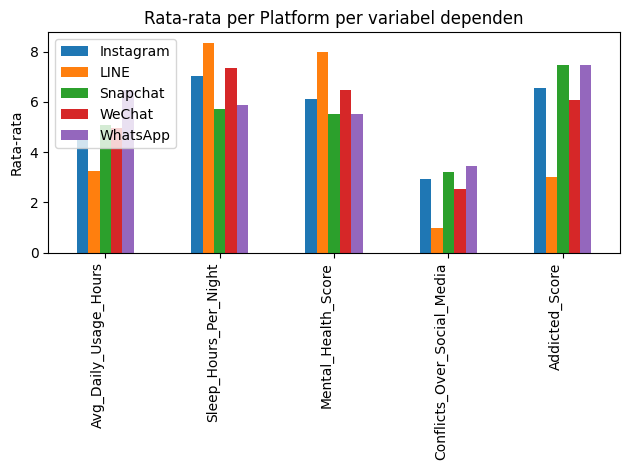

In [40]:
# Visualisasi Rata-rata per Gender untuk variabel dependen
# Dependent variables used in MANOVA
dependent_vars = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

# Group by 'Gender' and calculate the mean for the dependent variables
data_manova.groupby('Most_Used_Platform')[dependent_vars].mean().T.plot(kind='bar')


plt.title('Rata-rata per Platform per variabel dependen')
plt.ylabel('Rata-rata')
plt.xticks(rotation=90, ha='right') # Mengubah rotasi label sumbu x menjadi vertikal
plt.legend(loc='upper left') # Memindahkan legend agar tidak menutupi label di bawah
plt.tight_layout() # Menyesuaikan layout agar semua elemen terlihat
plt.show()